#  レコメンデーション応用


- **[2.1 データをテーブルに保存する。](#2.1-データをテーブルに保存する。)**
    - **[2.1.1 取得したデータを保存する。](#2.1.1-取得したデータを保存する。)**
    - **[2.1.2 URLの対応関係をデータベースに保存する。](#2.1.2-URLの対応関係をデータベースに保存する。)**
    - **[2.1.3 データが重複していないかどうか確かめる。](#2.1.3-データが重複していないかどうか確かめる。)**
    - **[2.1.4 crawl関数を書き直す。](#2.1.4-crawl関数を書き直す。)**
<br><br>
- **[2.2 クローラーをクラスにまとめる。](#2.2-クローラーをクラスにまとめる。)**
    - **[2.2.1 クラスの使い方](#2.2.1-クラスの使い方)**
    - **[2.2.2 初期値の設定](#2.2.2-初期値の設定)**
    - **[2.2.3 関数をクラスに入れる。](#2.2.3-関数をクラスに入れる。)**
<br><br>
- **[2.3 検索部分の作成](#2.3-検索部分の作成)**
    - **[2.3.1 クエリが含まれるURLを探す。(1)](#2.3.1-クエリが含まれるURLを探す。1)**
    - **[2.3.2 クエリが含まれるURLを探す。(2)](#2.3.2-クエリが含まれるURLを探す。2)**
<br><br>
- **[2.5 添削問題](#2.5-添削問題)**

***

## 2.1 データをテーブルに保存する。

### 2.1.1 取得したデータを保存する。

chapter1よりスクレイピングで取得したデータをテーブルに保存します。  
urllistテーブルとwordlistテーブル、wordlocationテーブルにデータを保存します。   

ignore_wordsにはchapter1の添削問題で求めた単語をセット型にして使用します。<br>
広く探索したものなので実際の結果とは異なる場合があります。

SQL文のinsertメソッドで特定のカラムに値を代入したいとき、   
insert into テーブル名(カラム1,カラム2,...) values(値1,値2,...)   
で代入することができます。   

```python

ignore_words = {'the','and','python','ext','ready','wikipedia','user','false','mediawiki','true'
                ,'for','page','styles','articles','template','gadget','not','help','article','from'}


def add_list(conn, url, soup):
    words = separate_words(soup)
    conn.execute("insert into urllist(url) values('%s')" % url)
    for i,word in enumerate(words):
        if word in ignore_words:
            continue
        conn.execute("insert into wordlist(word) values('%s')" % word)
        conn.execute("insert into wordlocation(urlid, wordid, location) values ('%s','%s',%d)" % (url,word, i))
    conn.commit()

```


% を使って文字列中に変数を代入する方法を %記法 といいます。   
SQL文に変数を入れたいとき%記法を利用しましょう。   

変数が数字の時 : %d   
変数が文字列の時 : %s   
と表すことができます。%記法のこの二つは使う機会が多いので覚えましょう。   
値は文字型なので '%s' としましょう。

#### 問題

- URLから入手したリンクのURLと単語をテーブルに保存してください。

In [ ]:
'''このchapterを通じてsoup_baseのWEBデータを共通して使います。上書きしないようにしてください。
    上書きしてしまったときもう一度このセルを実行してください。'''

import re
import sqlite3
import urllib.request
from bs4 import BeautifulSoup

ignore_words = {'the','and','python','ext','ready','wikipedia','user','false','mediawiki','true'
                ,'for','page','styles','articles','template','gadget','not','help','article','from'}


# chapter1で利用したseparate_word関数を利用します。
def separate_words(soup):
    text = soup.text
    pattern = re.compile("\W")
    words = [s.lower() for s in pattern.split(text) if len(s) > 2]
    return words


def add_list(conn, url, soup):
    words = separate_words(soup)
    # urllistにURLを追加してください。
    
    for i,word in enumerate(words):
        if word in ignore_words:
            continue
        # wordlistに単語を追加してください。
        
        # wordlocationにURLと単語、単語の位置を追加してください。
        
    # 値を追加し終わったときcommitメソッドを呼び出しましょう。

dbname = ("test.db")
conn = sqlite3.connect(dbname)
url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
html = urllib.request.urlopen(url)
soup_base = BeautifulSoup(html, "html.parser")

add_list(conn,url,soup=soup_base)

data = conn.execute("select * from wordlocation")
data_list = data.fetchall()
print(data_list)

conn.close()

#### ヒント

- 値を追加した後は.commitメソッドを呼び出してください。
- 文字列を置き換えるのには %s 、数字を置き換えるのには %d を使ってください。
- データベースを扱っているので何度も実行するとその都度データが追加されます。気になる場合は1.2.4を実行して作り直してください。

#### 解答


In [ ]:
'''このchapterを通じてsoup_baseのWEBデータを共通して使います。上書きしないようにしてください。
    上書きしてしまったときもう一度このセルを実行してください。'''

import re
import sqlite3
import urllib.request
from bs4 import BeautifulSoup

ignore_words = {'the','and','python','ext','ready','wikipedia','user','false','mediawiki','true'
                ,'for','page','styles','articles','template','gadget','not','help','article','from'}


# chapter1で利用したseparate_word関数を利用します。
def separate_words(soup):
    text = soup.text
    pattern = re.compile("\W")
    words = [s.lower() for s in pattern.split(text) if len(s) > 2]
    return words

def add_list(conn, url, soup):
    words = separate_words(soup)
    # urllistにURLを追加してください。
    conn.execute("insert into urllist(url) values('%s')" % url)
    for i,word in enumerate(words):
        if word in ignore_words:
            continue
        # wordlistに単語を追加してください。
        conn.execute("insert into wordlist(word) values('%s')" % word)
        # wordlocationにURLと単語、単語の位置を追加してください。
        conn.execute("insert into wordlocation(url, word, location) values ('%s','%s',%d)" % (url,word, i))
    # 値を追加し終わったときcommitメソッドを呼び出しましょう。
    conn.commit()

dbname = ("test.db")
conn = sqlite3.connect(dbname)
url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
html = urllib.request.urlopen(url)
soup_base = BeautifulSoup(html, "html.parser")

add_list(conn,url,soup=soup_base)

data = conn.execute("select * from wordlocation")
data_list = data.fetchall()
print(data_list)

conn.close()

***

### 2.1.2 URLの対応関係をデータベースに保存する。

urllistテーブル,linkテーブルにURLのリスト,URLの対応関係を保存します。   
url_fromをリンク元となるurl,url_toをリンクされたurlとします。   
url_toは上のadd_list関数のみではurllistに追加されない可能性があるのでここで追加します。   

```python
def add_url_list(conn, url_from_value, url_to_value):
    conn.execute("insert into urllist(url) values('%s')" % url_to_value)
    conn.commit()
    if url_from_value == url_to_value:
        return
    conn.execute("insert into link(url_from,url_to) values('%s','%s')", % (url_from_value, url_to_value))
    conn.commit()
```
url_fromとurl_toが同じの場合、linkには入れないことに注意してください。  
<br><br>
ここでURLに ' いれなかった理由を説明します。   
URLに ' がはいっている場合を考えてみます。   
url_to_value = "http ://aidemy'net" とするとSQL文は   

insert into urllist(url) values('http ://aidemy'net')   

となります。   

こうなると ' が三つ存在し、どこまでで値が切れるのかがわからなくなりエラーになってしまいます。   
そのためクローリングの時に' を除きました。

#### 問題

- 二つのURLをurllistとlinkテーブルに追加してください。

In [ ]:
import sqlite3

dbname = "test.db"
conn = sqlite3.connect(dbname)

def add_url_list(conn, url_from_value, url_to_value):
    # urllistにリンク先のURL(url_to)を追加してください。
    
    
    if url_from_value == url_to_value:
        return
    # URLの関係を追加してください。

    
    
url_from = "http://aidemy.net"
url_to = "http://blog.aidemy.net/"
add_url_list(conn,url_from,url_to)

conn.close()

#### ヒント

- 値を追加した後はcommitメソッドを忘れずに呼び出してください。
- データベースを扱っているので何度も実行するとその都度データが追加されます。気になる場合は1.2.4を実行して作り直してください。

#### 解答例

In [ ]:
import sqlite3

dbname = "test.db"
conn = sqlite3.connect(dbname)

def add_url_list(conn, url_from_value, url_to_value):
    # urllistにリンク先のURL(url_to)を追加してください。
    conn.execute("insert into urllist(url) values('%s')" % url_to_value)
    conn.commit()
    if url_from_value == url_to_value:
        return
    # URLの関係を追加してください。
    conn.execute("insert into link(url_from,url_to) values('%s','%s')" % (url_from_value, url_to_value))
    conn.commit()

url_from = "https://en.wikipedia.org/wiki/Python_(programming_language)"
url_to = "https://en.wikipedia.org/wiki/Interpreted_language"
add_url_list(conn, url_from, url_to)

data = conn.execute("select * from link")
data_list = data.fetchall()
print(data_list)

conn.close()

***

### 2.1.3 データが重複していないかどうか確かめる。

urllistテーブルとwordテーブルの要素はすべて重複していない必要があります。   
しかし現段階ではどちらも入力されたものはすべて追加してしまうため重複が生まれています。   
そこですでに追加されているか確認できる関数を作成します。   

重複を確認するためにselectメソッドを利用します。   
select文のおさらいです。   
select カラム名 from テーブル名 where 条件式   
で条件式に一致するデータのみを抜き出すことができます。   

value は URLか単語になるのでstr型にするため　'　'　でくくることを忘れないようにしましょう。   

ここでは重複を確認するcheck関数を実装します。<br>
check関数では値を確認し、重複指定内容であればテーブルに追加します。
```python
def check(conn, table, column, value):
    flag = conn.execute("select %s from %s where %s = '%s'" % (column, table, column, value)).fetchone()
    if flag:
        return 
    else :
        conn.execute("insert into %s(%s) values('%s')" % (table, column, value))
```

#### 問題

- 重複があるかどうか確認し、重複しないようであれば値を追加する関数を作成してください。   
- 関数では、コネクション・テーブル名・カラム名・値を受け取ります。

In [ ]:
import re
import sqlite3

dbname = ("test.db")
conn = sqlite3.connect(dbname)

ignore_words = {'the','and','python','ext','ready','wikipedia','user','false','mediawiki','true'
                ,'for','page','styles','articles','template','gadget','not','help','article','from'}

# 重複を確認し、重複しないようであれば値を追加する関数を作成してください。
def check(conn, table, column, value):

    


def separate_words(soup):
    text = soup.text
    pattern = re.compile("\W")
    words = [s.lower() for s in pattern.split(text) if len(s) > 2]
    return words


def add_list(conn, url, soup):
    print('Indexing '+url)
    words = separate_words(soup)
    for i,word_value in enumerate(words):
        if word_value in ignore_words:
            continue
        # check関数を利用してテーブルに値を追加してください。
        
        conn.execute("insert into wordlocation(url, word, location) values ('%s','%s',%d)" % (url,word_value, i))
        
        
def add_lli_st(conn, url_from_value, url_to_value):
    # check関数を利用してテーブルに値を追加してください。
    
    conn.commit()
    if url_from_value == url_to_value:
        return
    conn.execute("insert into link(url_from,url_to) values('%s','%s')" % (url_from_value, url_to_value))
    conn.commit()

url_from = "https://en.wikipedia.org/wiki/Python_(programming_language)"
url_to = "https://en.wikipedia.org/wiki/Interpreted_language"
add_url_list(conn, url_from, url_to)

        
url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
soup = soup_base

add_list(conn, url, soup)

data = conn.execute("select * from urllist")
data_list = data.fetchall()
print(data_list)

conn.close()

#### ヒント

- SQLにおいて値として追加するときは'%s'となりますが、テーブル名などは %s のみです。

#### 解答例

In [ ]:
import re
import sqlite3

dbname = ("test.db")
conn = sqlite3.connect(dbname)

ignore_words = {'the','and','python','ext','ready','wikipedia','user','false','mediawiki','true'
                ,'for','page','styles','articles','template','gadget','not','help','article','from'}

# 重複を確認し、重複しないようであれば値を追加する関数を作成してください。
def check(conn, table, column, value):
    flag = conn.execute("select %s from %s where %s = '%s'" % (column, table, column, value)).fetchone()
    if flag:
        return 
    else :
        conn.execute("insert into %s(%s) values('%s')" % (table, column, value))


def separate_words(soup):
    text = soup.text
    pattern = re.compile("\W")
    words = [s.lower() for s in pattern.split(text) if len(s) > 2]
    return words

def add_list(conn, url, soup):
    print('Indexing '+url)
    words = separate_words(soup)
    for i,word_value in enumerate(words):
        if word_value in ignore_words:
            continue
        # check関数を利用してテーブルに値を追加してください。
        check(conn,'wordlist','word',word_value)
        conn.execute("insert into wordlocation(url, word, location) values ('%s','%s',%d)" % (url,word_value, i))
        
        
def add_url_list(conn, url_from_value, url_to_value):
    # check関数を利用してテーブルに値を追加してください。
    check(conn,'urllist','url',url_to_value)
    conn.commit()
    if url_from_value == url_to_value:
        return
    conn.execute("insert into link(url_from,url_to) values('%s','%s')" % (url_from_value, url_to_value))
    conn.commit()

url_from = "https://en.wikipedia.org/wiki/Python_(programming_language)"
url_to = "https://en.wikipedia.org/wiki/Interpreted_language"
add_url_list(conn, url_from, url_to)

        
url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
soup = soup_base

add_list(conn, url, soup)

data = conn.execute("select * from urllist")
data_list = data.fetchall()
print(data_list)

conn.close()

***

### 2.1.4 crawl関数を書き直す。

完成したadd_listメソッドとadd_url_listメソッドをcrawlメソッドに書き加えてURLと単語、URLの関係をデータベースに保存できるようにしましょう。   
下のものがchapter1で作成したcrawlメソッドです。   
```python

def crawl(pages, depth=2):
    words_list = []
    for i in range(depth):
        newpages = set()
        pages_list = pages
        for page in pages:
            #print(page)
            count = 0
            try:
                html = urllib.request.urlopen(page)
            except:
                print('こちらのURLは開けませんでした : %s' % page)
                continue
            soup = BeautifulSoup(html, "html.parser")
            words_list.append((page,separate_word(soup)))
            links = soup.find_all('a')
            for link in links:
                if ('href' in link.attrs):
                    url = urllib.parse.urljoin(page, link['href'])
                    url = url.split('#')[0]
                    if url.find("'") != -1:
                                continue
                    if url[0:4] == 'http' and not url in (pages_list):
                        newpages.add(url)
                    count += 1
                    if count > 10:
                        break
            pages = newpages
            pages_list = pages_list | pages
    return words_list
            
```

#### 問題

- crawlメソッドにadd_listメソッドとadd_url_listメソッドを加えて、入手データをデータベースに書き込めるようにしてください。

In [ ]:
# 適切な部分に関数を書き加えてください。
def crawl(pages, depth=2):
    words_list = []
    for i in range(depth):
        newpages = set()
        pages_list = pages
        for page in pages:
            #print(page)
            count = 0
            try:
                html = urllib.request.urlopen(page)
            except:
                print('こちらのURLは開けませんでした : %s' % page)
                continue
            soup = BeautifulSoup(html, "html.parser")
            words_list.append((page,separate_word(soup)))
            links = soup.find_all('a')
            for link in links:
                if ('href' in link.attrs):
                    url = urllib.parse.urljoin(page, link['href'])
                    url = url.split('#')[0]
                    if url.find("'") != -1:
                                continue
                    if url[0:4] == 'http' and not url in (pages_list):
                        newpages.add(url)
                    count += 1
                    if count > 10:
                        break
            pages = newpages
            pages_list = pages_list | pages
    return words_list

#### ヒント

- インデックスに注意して書き加えてください。

#### 解答例

In [ ]:
# 適切な部分に関数を書き加えてください。
def crawl(pages, depth=2):
    words_list = []
    for i in range(depth):
        newpages = set()
        pages_list = pages
        for page in pages:
            #print(page)
            count = 0
            try:
                html = urllib.request.urlopen(page)
            except:
                print('こちらのURLは開けませんでした : %s' % page)
                continue
            soup = BeautifulSoup(html, "html.parser")
            add_list(conn,page,soup)
            words_list.append((page,separate_word(soup)))
            links = soup.find_all('a')
            for link in links:
                if ('href' in link.attrs):
                    url = urllib.parse.urljoin(page, link['href'])
                    url = url.split('#')[0]
                    if url.find("'") != -1:
                                continue
                    if url[0:4] == 'http' and not url in (pages_list):
                        newpages.add(url)
                        add_url_list(conn,page,url)
                    count += 1
                    if count > 10:
                        break
            pages = newpages
            pages_list = pages_list | pages
    return words_list

## 2.2 クローラーをクラスにまとめる。

### 2.2.1 クラスの使い方

pythonではクラスと呼ばれるものを利用することによって、いくつかのモジュールをまとめて一つにすることができます。   
クラスとはどういうものか理解するために例として車のクラスを考えてみます。   
車は分解してみると、
- タイヤ  
- ドア  
- ハンドル  
- 値段   

といったように車は様々なパーツに分解することができとします。   
これをクラスで表すと、   

```python

class car:
    def __init__(self):
        self.price = 1000
       
    def wheel(self,size):
        self.wheel_size = size
        '''その他タイヤを作るのに必要な処理'''
    
    def door(self):
        '''ドアを作るのに必要な処理'''
    
    def handle(self):
        '''ハンドルを作るのに必要な処理'''

```
と表すことができます。   
このように車を構成するような関数をまとめたものが車のクラスとなります。   
クラスの使い方は上の車の例を参考に覚えましょう。   
   
クラス内で定義した変数や関数を使用したい場合はself.wheel()のように関数名の前にselfを付けます。   
クラス内で変数を定義したいときは wheelモジュールでwheel_sizeを定義しているように関数と同様selfを付けてください。   
関数名の第一引数にselfとありますがこれはおまじないとして覚えてください。   
関数内はクラス内の変数、関数以外は今まで通りのコードを書くことができます。   


実はクラスはこのままでは使えず、   
``` python
C = car()
```
のようにクラスの入れ物を生成する必要があります。   
この C をオブジェクトといいます。   
クラスの関数をよびだすときには オブジェクト.関数名 としてください。   

クラスには` __init__()`　という特別な関数があります。   
`__init__()`はオブジェクトが生成されたときに必ず実行される関数です。   
すべてのオブジェクトに共通して実行したい命令をここに代入します。   


#### 問題

- 数字を計算するクラスを作成してください。
- 関数を埋めて元の数に四則演算を行います。
- オブジェクト生成時に与えた数字はinitに渡されます。

In [ ]:
class calculate:
    # 以下の空欄を埋めて関数を定義してください。
    def __init__(self, base):
        self.num = 
        
    def add(self, add_num):
        self.num += add_num
        return self.num
    
    def sub(self, sub_num):
        self.num -= sub_num
        return self.num
    
    # 空欄を埋めて関数を完成させてください。
    def mul(self, mul_num):

        
    
    # クラスが持っている数を入力された数字で割る関数divを定義してください。

    
    
    
number = calculate(100)
print(number.add(20))
print(number.mul(0.5))


#### ヒント

- クラス内の関数は第一引数にselfを持つことに注意してください。

#### 解答例

In [ ]:
class calculate:
    # 以下の空欄を埋めて関数を定義してください。
    def __init__(self, base):
        self.num = base
        
    def add(self, add_num):
        self.num += add_num
        return self.num
    
    def sub(self, sub_num):
        self.num -= sub_num
        return self.num
    # 空欄を埋めて関数を完成させてください。
    def mul(self, mul_num):
        self.num *= mul_num
        return self.num
    
    # クラスが持っている数を入力された数字で割る関数を定義してください。
    def div(self, div_num):
        self.num /= div_num
        return self.num
    
number = calculate(100)
print(number.add(20))
print(number.mul(0.5))


***

### 2.2.2 初期値の設定

クラスメソッドには`__init__()`といったような特殊メソッドが存在することをchapter1で学びました。   
他にも特殊メソッドは数多く存在します。   
- `__add__()` :   
同じクラスのオブジェクト同士で+演算子を使用したときに呼び出される。   
- `__mul__()` :   
同じクラスのオブジェクト同士で * 演算子を使用したときに呼び出される。  
- `__del__()` :   
オブジェクトが削除されるときに呼び出される。   

これ以外にも様々な特殊メソッドがあります。   
`__init__()`はよく使用するので覚えておきましょう。   

#### 問題

- crawlerクラスを作成してください。
- オブジェクト生成時にデータベースにつなげ、オブジェクト削除時にデータベースとのつながりを閉じてください。

In [ ]:
class crawler:
    # 初期設定でコネクションを作成してください。

    
    # オブジェクトが削除されるときに接続が切れるようにしてください。

    

#### ヒント

- クラス内で使う変数はself.変数名となります。
- オブジェクトが削除されると`__del__`メソッドが呼び出されます。

#### 解答

In [ ]:
class crawler:
    # 初期設定でコネクションを作成してください。
    def __init__(self,dbname):
        self.conn = sqlite3.connect(dbname)
    
    # オブジェクトが削除されるときに接続が切れるようにしてください。
    def __del__(self):
        self.conn.close()
        

***

### 2.2.3 関数をクラスに入れる。

ここまでで多数の関数を作成してきました。  
ただ量が多くなるとどれがなんのための関数かわからなくなってしまいます。   
クローラーに関する関数はわかりやすくするためにクラスにまとめましょう。   

クラスで定義するときの注意点をおさらいしてみると、   
1. クラス内の関数の第一引数はselfになります。
2. クラス内で関数の呼び出し、共通の変数を使用するときはself.関数名または変数名とします。   
3. クラス内では一つインデックスを下げる必要があります。

などがあります。

#### 問題

- 以下にchapter1,2で定義してきた関数があります。
- これらをcrawlerクラスの関数として書き換えてください。

```python
                
def separate_word(soup):
    text = soup.text
    pattern = re.compile("\W")
    words = [s.lower() for s in pattern.split(text) if len(s) > 2]
    return words

def check(conn,table,column,value):
    flag = conn.execute("select %s from %s where %s = '%s'" % (column, table, column, value)).fetchone()
    if flag:
        return 
    else :
        conn.execute("insert into %s(%s) values(%s)" % (table, column, value))


def add_list(conn, url, soup):
    
    print('Indexing '+url)
    words = separate_words(soup)
    for i,word_value in enumerate(words):
        if word_value in ignorewords:
            continue
        check(conn,'wordlist','word',word_value)
        conn.execute("insert into wordlocation(url, word, location) values (%d,%d,%d)" % (url,word, i))
        
        
def add_url_list(conn, url_from_value, url_to_value):
    check(conn,'urllist','url_from',url_from_value)
    check(conn,'urllist','url_to',url_to_value)
    conn.commit()
    if url_from_value == url_to_value:
        return
    conn.execute("insert into link(from,to) values(%s,%s)" % (url_from, url_to))
    conn.commit()
    

def crawl(pages, depth=2):
    words_list = []
    for i in range(depth):
        newpages = set()
        pages_list = pages
        for page in pages:
            #print(page)
            count = 0
            try:
                html = urllib.request.urlopen(page)
            except:
                print('こちらのURLは開けませんでした : %s' % page)
                continue
            soup = BeautifulSoup(html, "html.parser")
            add_list(conn,page,soup)
            words_list.append((page,separate_word(soup)))
            links = soup.find_all('a')
            for link in links:
                if ('href' in link.attrs):
                    url = urllib.parse.urljoin(page, link['href'])
                    url = url.split('#')[0]
                    if url.find("'") != -1:
                                continue
                    if url[0:4] == 'http' and not url in (pages_list):
                        newpages.add(url)
                        add_url_list(conn,page,url)
                    count += 1
                    if count > 10:
                        break
            pages = newpages
            pages_list = pages_list | pages
    return words_list
            
def create_table(conn):
    conn.execute("create table urllist(url)")
    conn.execute("create table wordlist(word)")
    conn.execute("create table wordlocation(url, word, location)")
    conn.execute("create table link(url_from, url_to)")
    
```


In [ ]:
class crawler:
    def __init__(self, dbname):
        self.conn = sqlite3.connect(dbname)
    
    def __del__(self):
        self.conn.close()
        
    # 続けて関数を定義してください。
        

#### ヒント

- 関数の第一引数にはselfを渡してください。
- クラス内の変数や関数を呼び出すときはself.関数名・変数名とする必要があります。

#### 解答例

In [ ]:
class crawler:
    
    def __init__(self, dbname):
        self.conn = sqlite3.connect(dbname)
    
    def __del__(self):
        self.conn.close()
    
    # 続けて関数を定義してください。
    def separate_word(self, soup):
        text = soup.text
        pattern = re.compile("\W")
        words = [s.lower() for s in pattern.split(text) if len(s) > 2]
        return words

    def check(self, table, column, value):
        flag = self.conn.execute("select %s from %s where %s = '%s'" % (column, table, column, value)).fetchone()
        if flag:
            return 
        else :
            self.conn.execute("insert into %s(%s) values(%s)" % (table, column, value))


    def add_list(self, url, soup):

        print('Indexing '+url)
        words = separate_words(soup)
        for i,word_value in enumerate(words):
            if word_value in ignorewords:
                continue
            self.check('wordlist','word',word_value)
            self.conn.execute("insert into wordlocation(url, word, location) values (%d,%d,%d)" % (url,word, i))


    def add_url_list(self, url_from_value, url_to_value):
        self.check('urllist','url_from',url_from_value)
        self.check('urllist','url_to',url_to_value)
        self.conn.commit()
        if url_from_value == url_to_value:
            return
        self.conn.execute("insert into link(from,to) values(%s,%s)" % (url_from, url_to))
        self.conn.commit()


    def crawl(self, pages, depth=2):
        words_list = []
        for i in range(depth):
            newpages = set()
            pages_list = pages
            for page in pages:
                #print(page)
                count = 0
                try:
                    html = urllib.request.urlopen(page)
                except:
                    print('こちらのURLは開けませんでした : %s' % page)
                    continue
                soup = BeautifulSoup(html, "html.parser")
                add_list(conn,page,soup)
                words_list.append((page,separate_word(soup)))
                links = soup.find_all('a')
                for link in links:
                    if ('href' in link.attrs):
                        url = urllib.parse.urljoin(page, link['href'])
                        url = url.split('#')[0]
                        if url.find("'") != -1:
                                    continue
                        if url[0:4] == 'http' and not url in (pages_list):
                            newpages.add(url)
                            add_url_list(conn,page,url)
                        count += 1
                        if count > 10:
                            break
                pages = newpages
                pages_list = pages_list | pages
        return words_list
                
    
    def create_table(self):
        self.execute("create table urllist(url)")
        self.execute("create table wordlist(word)")
        self.execute("create table wordlocation(url, word, location)")
        self.execute("create table link(url_from, url_to)")

***

## 2.3 検索部分の作成

### 2.3.1 クエリが含まれるURLを探す。1

ソフトウェアに対するデータの問い合わせや要求などのことをクエリと呼びます。   
入力されたクエリを用いて、クエリが含まれているURLを返す関数を作成していきます。   

関数の実装をする前にSQL文を利用して複数のテーブルからほしいデータを取り出す手法を学びましょう。   
SQL文のselectメソッドで複数のテーブルを指定したいとき次のように指定できます。  

select テーブル名1.カラム名1 テーブル名2.カラム名2 from テーブル名1,テーブル名2 

またテーブルには

テーブル名 別名

で別名をつけることもできます。   
別名を付けたテーブルはイメージとして複製されたと考えます。   
例として以下のSQL文の実行されたときを考えてみます。   
```python
select w0.url from wordlocation w0, wordlocation w1 where w0.url = w1.url and w0.word = 'python' and w1.word = 'recommend'
```
同じwordlocationでもw0とw1ができたと考えます。 <br>
以下の図を参考にしてください。   

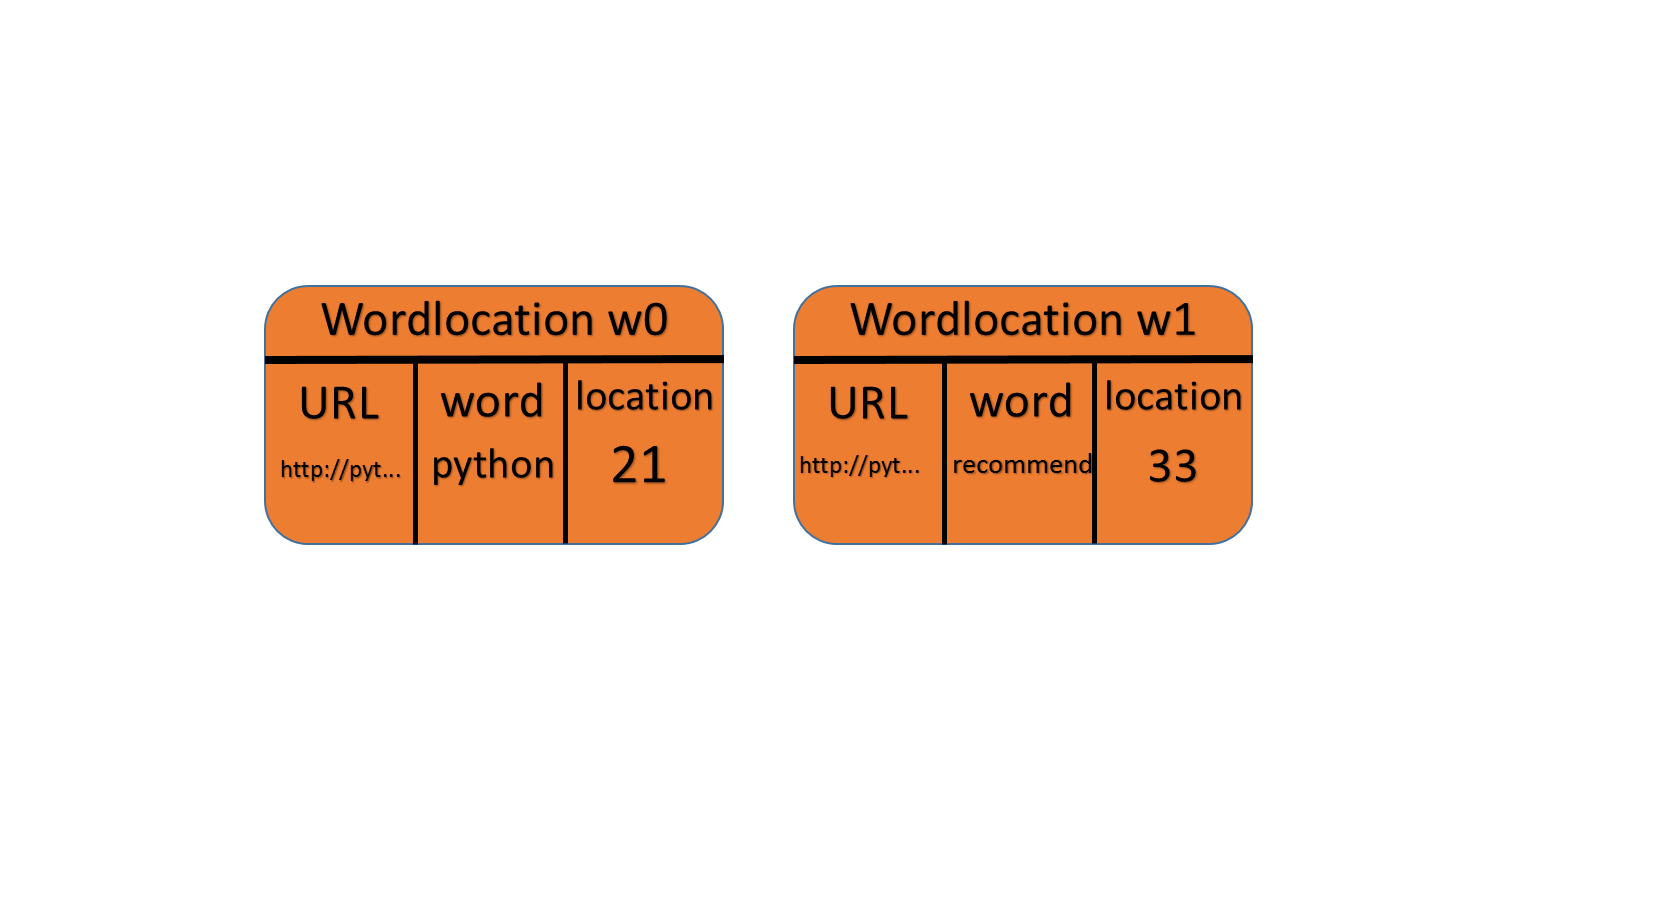




#### 問題

- dataフォルダ内にあるwebpage.dbのwordlocationテーブルのカラムにはurl,word,locationがあります。
- pythonとrecommendの両方入ったURLを抜き出して、url_listにリストの形で代入してください。

In [ ]:
import sqlite3

dbname = "data/webpage.db"
conn = sqlite3.connect(dbname)

# URLをリストにして抜き出してください。

print(url_list)

conn.close()

#### ヒント

- webpage.dbはwikipediaでのpythonの検索ページから200ページ分クロールしたデータセットです。
- 条件を複数選択したい場合は and が使えます。

#### 解答

In [ ]:
import sqlite3

dbname = "data/webpage.db"
conn = sqlite3.connect(dbname)

# URLをリストにして抜き出してください。
sql = "select w0.url from wordlocation w0, wordlocation w1 where w0.url = w1.url and w0.word = 'python' and w1.word = 'recommend'"
url_list = conn.execute(sql).fetchall()

print(url_list)

conn.close()

***

### 2.3.2 クエリが含まれるURLを探す。2

それでは関数を実装していきます。   
関数のアルゴリズムは、
1. クエリを単語ごとに分解する。   
2. 単語が含まれているか判断するSQL文を作成する。   
3. SQL文を実行してURLとクエリの単語の位置のリストを受け取る。   

になります。   
2.で単語ごとにSQL文を作成するには
- clumnlist :   
抜き出したいカラムを設定する。   
- tablelist :   
対象となるテーブルを設定する。   
- conitionlist :   
条件文を設定する。   

の三つを作成します。

```python
def get_match_rows(conn, q):
    columnlist = 'w0.urlid'
    tablelist = ''
    conditionlist = ''
    words_list = []

    words = q.split(' ')
    tablenumber = 0
    for word in words:
        wordrow = cocn.execute("select word from wordlist where word='%s'" %word).fetchone()
        if wordrow :
            words_list.append(word)
            if tablenumber > 0:
                tablelist += ','
                clauselist += ' and w%d.urlid=w%d.urlid and ' % (tablenumber-1,tablenumber)
            fieldlist += ',w%d.location' % tablenumber
            tablelist += 'wordlocation w%d' % tablenumber
            clauselist+='w%d.wordid=%d' % (tablenumber,word)
            tablenumber += 1

    sql="select %s from %s where %s" % (fieldlist,tablelist,clauselist)
    cur=conn.execute(sql)
    rows=[row for row in cur]
    return rows,words_list
    
```

#### 問題

- クエリの含まれたURLとクエリの単語の位置を返す関数を実装してください。
- SQL文が複雑になるので単語が二つの場合を考えて実装していくと理解しやすいです。

In [ ]:
def get_match_rows(conn, q):
    # それぞれに初期状態を設定してください。
    columnlist = 
    tablelist = 
    conditionlist = 
    words_list = []

    words = q.split(' ')
    tablenumber = 0
    for word in words:
        
        wordrow = cocn.execute("select word from wordlist where word='%s'" %word).fetchone()
        if wordrow :
            words_list.append(word)
            if tablenumber > 0:
                # ふたつめ以降の単語が追加されたときの処理を書いてください。
                tablelist += 
                conditionlist += 
                
            # 単語が追加されたときの処理を書いてください。
            columnlist += 
            tablelist += 
            conditionlist+=
            tablenumber += 1
    # 条件に合うURLとそのURLにおけるクエリの単語の位置を返してください。
    sql=
    cur=conn.execute(sql)
    rows=[row for row in cur]
    return rows,words_list

rows,words_list = 

#### ヒント

- 入手したいデータはURLだけでなく、クエリの単語の位置もあるので注意してください。

#### 解答例

In [ ]:
import sqlite3

def get_match_rows(conn, q):
     # それぞれに初期状態を設定してください。
    columnlist = 'w0.url'
    tablelist = ''
    conditionlist = ''
    words_list = []

    words = q.split(' ')
    tablenumber = 0
    for word in words:
        wordrow = conn.execute("select word from wordlist where word='%s'" %word).fetchone()
        if wordrow :
            words_list.append(word)
            if tablenumber > 0:
                # ふたつめ以降の単語が追加されたときの処理を書いてください。
                tablelist += ','
                conditionlist += ' and w%d.url=w%d.url and ' % (tablenumber-1,tablenumber)
            # 単語が追加されたときの処理を書いてください。
            columnlist += ',w%d.location' % tablenumber
            tablelist += 'wordlocation w%d' % tablenumber
            conditionlist+="w%d.word='%s'" % (tablenumber,word) 
            tablenumber += 1

    # 条件に合うURLとそのURLにおけるクエリの単語の位置を返してください。
    sql="select %s from %s where %s" % (columnlist,tablelist,conditionlist)
    try:
        cur=conn.execute(sql)
    except:
        print('探しているページは見つかりませんでした。')
        rows = []
        return  rows,words_list
    rows=[row for row in cur]
    return rows,words_list

dbname = 'webpage.db'
conn = sqlite3.connect(dbname)
query = "python machine"

rows, words_list = get_match_rows(conn, query)
print(rows[:30])

***

##  添削問題

これまで実装してきたものを利用して、クエリで入力した文字の含まれるURLをおすすめできているか確認しましょう。   
データベースにはdataフォルダ内のwebpage.dbを利用してください。   
webpage.dbにはwikipediaでのpythonの検索結果のURLからのクローリングの結果が200ページ分入っています。

#### 問題

- getmatchrow関数を利用して、クエリで入力した文字の含まれるURLを10表示しておすすめできているか確認してください。
- クエリはinputメソッドを利用して入力できるようにしてください。
- try,exceptメソッドを利用して、一致する単語が見つからなくてもエラーが出ないようにしてください。

In [ ]:
import sqlite3

# クエリで入力した文字の含まれるURLを返す関数を実装してください。
def get_match_rows(conn, q):

    

dbname = "data/webpage.db"
conn = sqlite3.connect(dbname)

# クエリを自分で入力できるようにしてください。


rows, words_list = get_match_rows(conn, query)

# 返されたURLを10表示してください。



#### ヒント

- try中でエラーが出た場合、exceptの内容が実行されます。

#### 解答例

In [ ]:
import sqlite3

# クエリで入力した文字の含まれるURLを返す関数を実装してください。
def get_match_rows(conn,q):
    columnlist = 'w0.url'
    tablelist = ''
    conditionlist = ''
    words_list = []

    words = q.split(' ')
    tablenumber = 0
    for word in words:
        wordrow = conn.execute("select word from wordlist where word='%s'" %word).fetchone()
        if wordrow :
            words_list.append(word)
            if tablenumber > 0:
                tablelist += ','
                conditionlist += ' and w%d.url=w%d.url and ' % (tablenumber-1,tablenumber)
            columnlist += ',w%d.location' % tablenumber
            tablelist += 'wordlocation w%d' % tablenumber
            conditionlist+="w%d.word='%s'" % (tablenumber,word) 
            tablenumber += 1

    sql="select %s from %s where %s" % (columnlist,tablelist,conditionlist)
    try:
        cur=conn.execute(sql)
    except:
        print('探しているページは見つかりませんでした。')
        rows = []
        return  rows,words_list
    rows=[row for row in cur]
    return rows,words_list

dbname = "data/webpage.db"
conn = sqlite3.connect(dbname)

# クエリを自分で入力できるようにしてください。
query = input("input what word do you want to search ?")
rows, words_list = get_match_rows(conn, query)

# 返されたURLを10表示してください。
for row in rows[:10]:
    print(row[0])


#### 解説

wordlocationからURLを持ってきているのでURLが重複してしまいます。   
chapter3ではレコメンドに重みをつけ、URLも重複しないように改善します。

***